<a href="https://colab.research.google.com/github/prudhviraj2005/Ml-learn/blob/main/handling_imbalenced_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
np.random.seed(123)

n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [ ]:
n_class_0,n_class_1

(900, 100)

In [ ]:
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0 })
class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1 })

In [ ]:
df = pd.concat([class_0, class_1]).reset_index(drop=True)

In [ ]:
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [ ]:
df['target'].value_counts()

,count
target,
0,900
1,100


**upsampling**

In [ ]:
df_minprity = df[df['target']==1]
df_majority = df[df['target']==0]

In [ ]:
from sklearn.utils import resample

In [ ]:
df_minority_upsampled = resample(df_minprity, replace=True, n_samples=len(df_majority), random_state=42)

In [ ]:
df_minority_upsampled.shape

(900, 3)

In [ ]:
df_minority_upsampled.head()

,feature_1,feature_2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1


In [ ]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [ ]:
df_upsampled['target'].value_counts()

,count
target,
0,900
1,900


downsampling


In [ ]:
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0 })
class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1 })

In [ ]:
df = pd.concat([class_0, class_1]).reset_index(drop=True)

In [ ]:
df['target'].value_counts()

,count
target,
0,900
1,100


In [ ]:
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [ ]:
from sklearn.utils import resample

In [ ]:
df_majority_downsampled = resample(df_majority, replace=True, n_samples=len(df_minority),random_state = 42)

In [ ]:
df_majority_downsampled.shape

(100, 3)

In [ ]:
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

In [ ]:
df_downsampled['target'].value_counts()

,count
target,
1,100
0,100


SMOTE ( Synthetic Minority Oversampling Technique)- used in ml for imbalanced datasets where minority calss have fewer instances than majority class.

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
x,y = make_classification(n_samples = 1000, n_redundant=0,n_features=2,n_clusters_per_class=1, weights =[0.90],random_state=12)

In [ ]:
x

array([[-0.76289759, -0.70680807],
       [-1.07543571, -1.0511621 ],
       [-0.61011459, -0.90980157],
       ...,
       [-1.32643852, -1.815178  ],
       [-0.83348573, -0.5146474 ],
       [-0.30287558, -0.57597532]])

In [ ]:
y

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [ ]:
x.shape

(1000, 2)

In [ ]:
len(y[y==0])

900

In [ ]:
len(y[y==1])

100

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.DataFrame(x,columns=['f_1','f_2'])
df2 = pd.DataFrame(y,columns=['target'])
final_df = pd.concat([df1,df2],axis=1)
final_df.head()

,f_1,f_2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [ ]:
final_df['target'].value_counts()

,count
target,
0,900
1,100


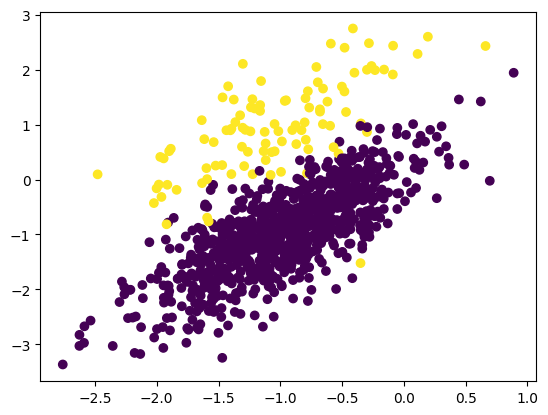

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f_1'],final_df['f_2'],c=final_df['target'])

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
oversample = SMOTE()

In [ ]:
x,y = oversample.fit_resample(final_df[['f_1','f_2']], final_df['target'])

In [ ]:
x.shape

(1800, 2)

In [ ]:
y.shape

(1800,)

In [ ]:
len(y[y==0])

900

In [ ]:
len(y[y==1])

900

In [ ]:
df1 = pd.DataFrame(x,columns=['f_1','f_2'])
df2 = pd.DataFrame(y,columns=['target'])
oversample = pd.concat([df1,df2],axis=1)
oversample

,f_1,f_2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
1795,-1.974626,-0.182817,1
1796,-1.378685,0.922249,1
1797,-1.036961,0.541619,1
1798,-1.897830,-0.148858,1


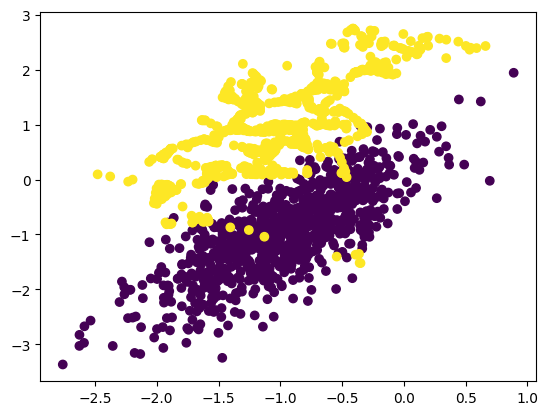

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(oversample['f_1'],oversample['f_2'],c=oversample['target'])